## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## Objective
To cluster the countries using some socio-economic and health factors that determine the overall development of the country and then present the solution and recommendations to the CEO.

We will do the following steps:
1. Read and understand data
2. Clean data
3. Exploratory Data Analysis
4. Outlier Analysis
5. Preparing Data for Clustering
6. Hopkins Test: To measure the cluster tendency
7. Finding the Optimal Number of Clusters:
   - Elbow Curve
   - Silhouette Analysis
8. Modeling
   - K-means Clustering
   - Perform Cluster profiling
   - Hierarchical Clustering
9. Summary/ Recommendations

#  <font color='blue'>Step1: Read and Understand data</font>

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy import stats
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
country_data = pd.read_csv("Country-data.csv")

In [3]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data.shape

(167, 10)

In [5]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


We can see there is presence of outlier(like in gdpp and income) as there is huge gap in mean and median. WE will analyse this in EDA

In [6]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# <font color='blue'>Step 2: Clean data</font>

## 2.1 Handling Missing Values

In [8]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values

## 2.2 Changing Values

In [9]:
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['imports'] = country_data['imports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# <font color='blue'>Step 3: Exploratory Data Analysis</font>

In [10]:
continuous_var = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

## 3.1 Univariate Analysis

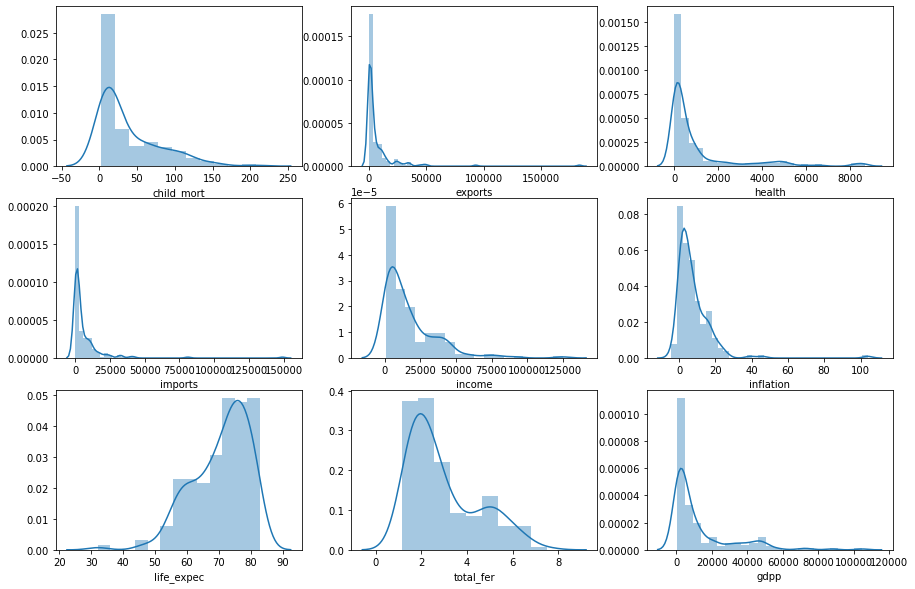

In [11]:
# using Distplot
plt.figure(figsize=(15,10))
for col in enumerate(continuous_var):
    plt.subplot(3,3,col[0]+1);
    sns.distplot(country_data[col[1]]);

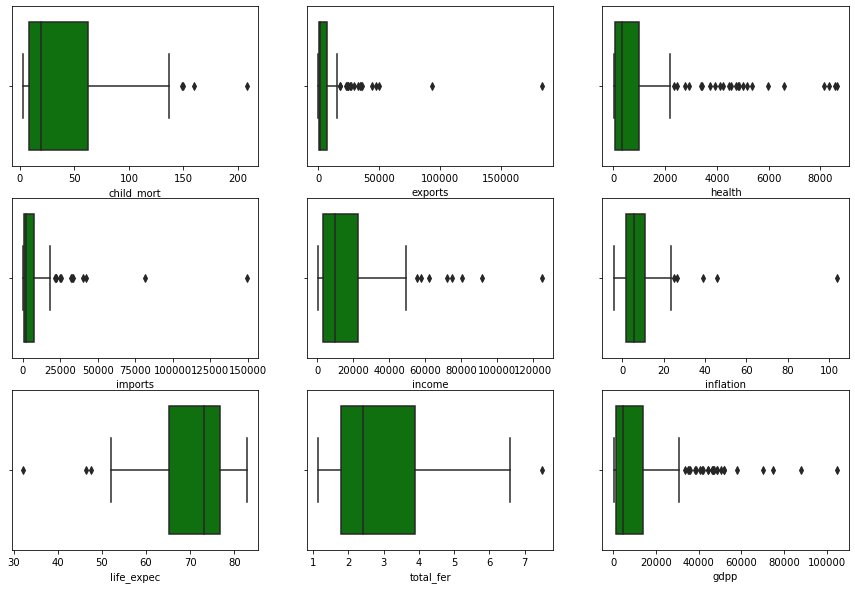

In [12]:
# Using boxplot
plt.figure(figsize=(15,10))
for col in enumerate(continuous_var):
    plt.subplot(3,3,col[0]+1);
    sns.boxplot(country_data[col[1]], color = 'green');

<b>`INFERENCE`:</b>
We can observe that the plots are highly skewed which tells that outliers are present.

## 3.2 Bivariate Analysis

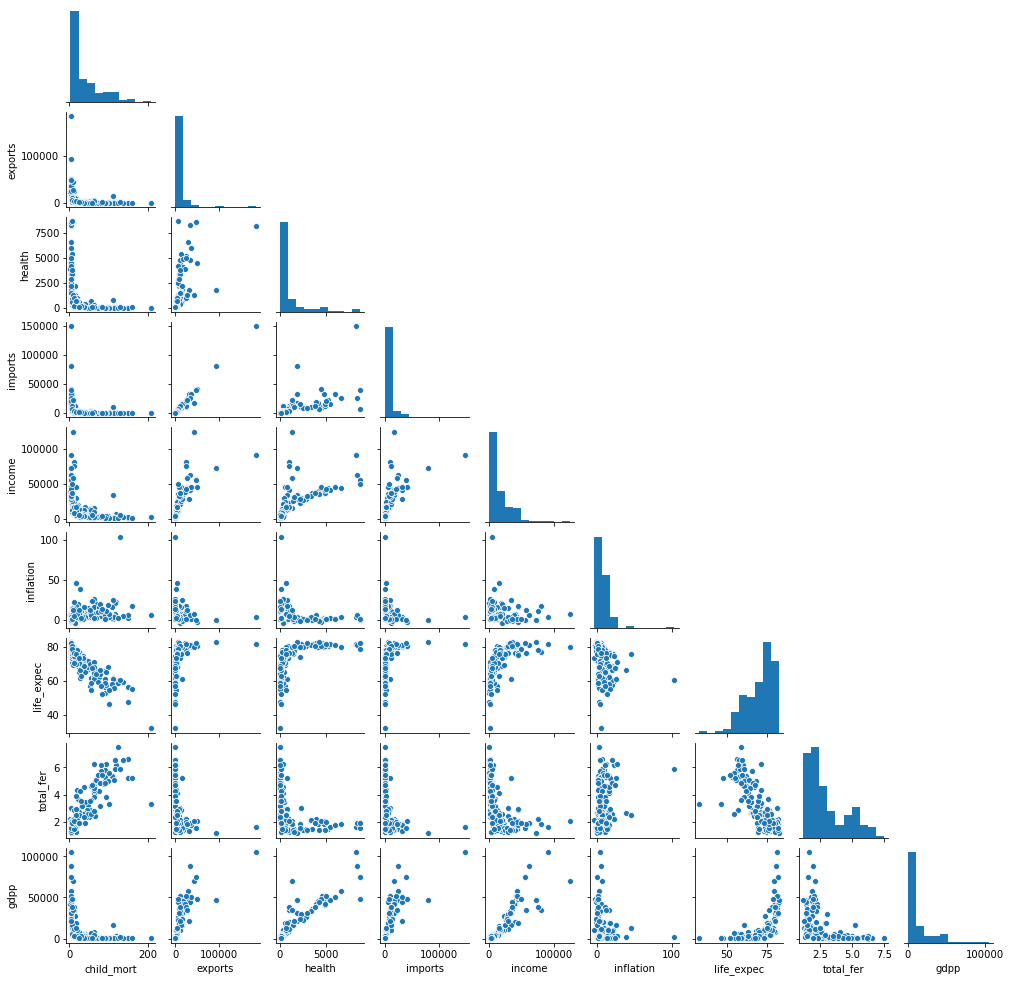

In [13]:
sns.pairplot(country_data, corner=True, height = 1.5)
plt.show()

<b>`INFERENCE`:</b>
1. We can see that graphs are highly skewed.
2. We can observe presence of outliers.
3. We can observe that there is a linear relationshp between certain varaibles(we observe the same from heatmap below) like imports-exports(0.99), health-gdpp(0.92), income-gdpp(0.9), total_fer,child_mort(0.85)

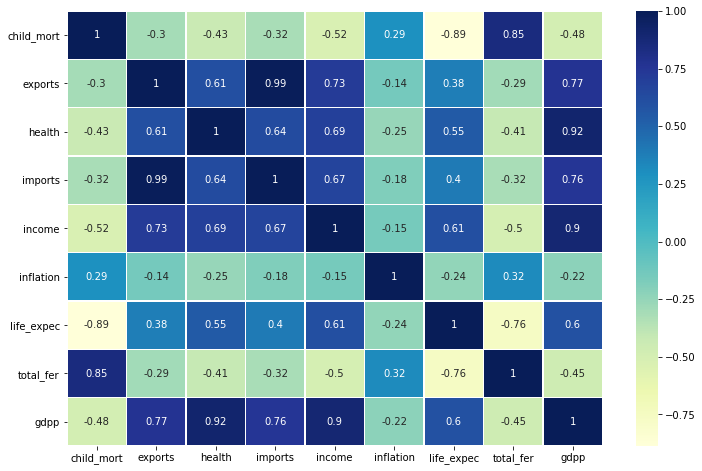

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(country_data.corr(),annot = True,linewidths=.5, cmap="YlGnBu")
plt.show()

We will plot bar chart for the following:
1. Top 10 countries with high Child mortality
2. Top 10 countries with high Inflation.
3. Top 10 countries with very low GDPP.
4. Top 10 countries with very low income.
5. Top 10 countries with very low export.
6. Top 10 countries with very low health.

In [15]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [16]:
var = [{'col_name':'child_mort','asc': False},{'col_name': 'inflation', 'asc': False}, {'col_name': 'gdpp', 'asc': True},{'col_name': 'income', 'asc': True},{'col_name': 'exports', 'asc': True},{'col_name': 'health', 'asc': True}]

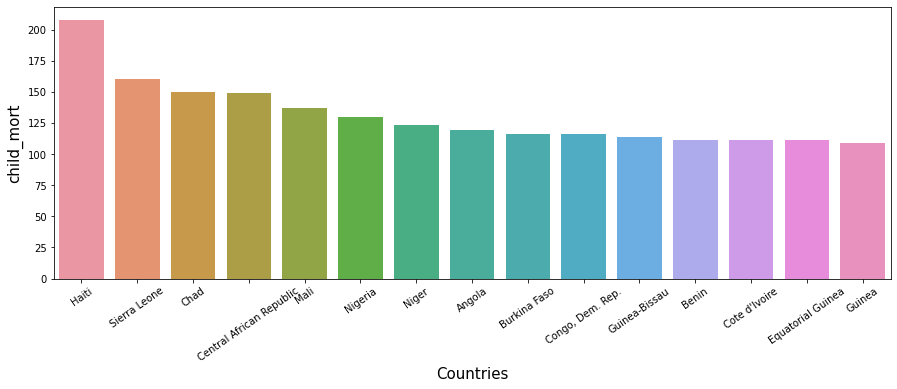

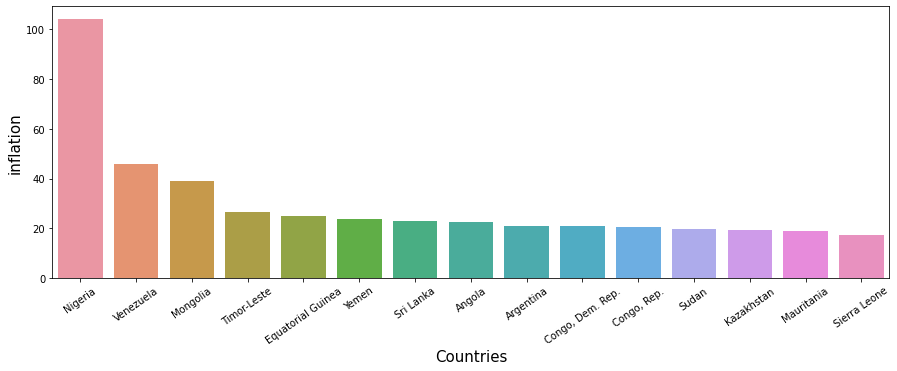

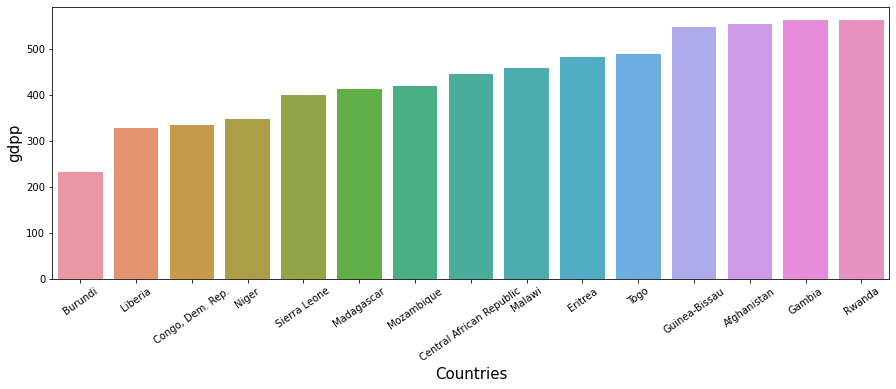

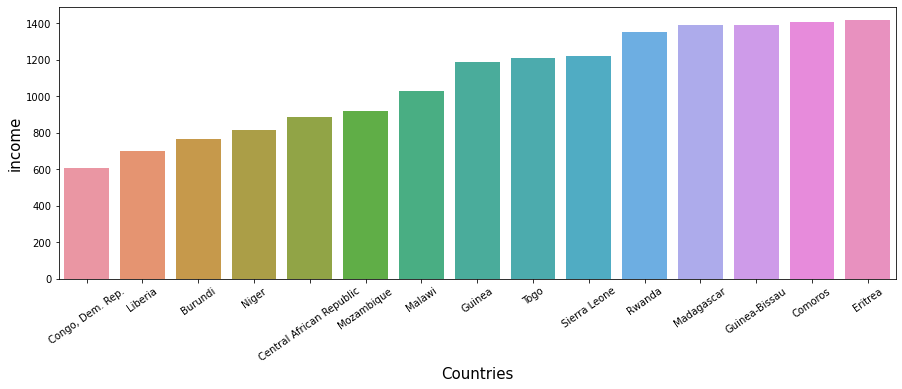

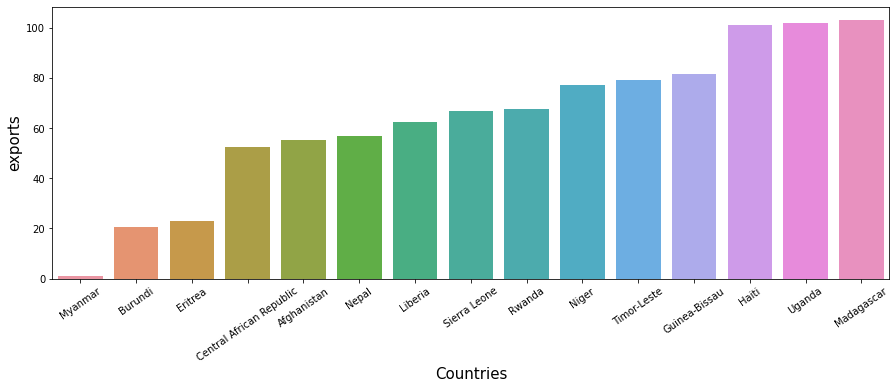

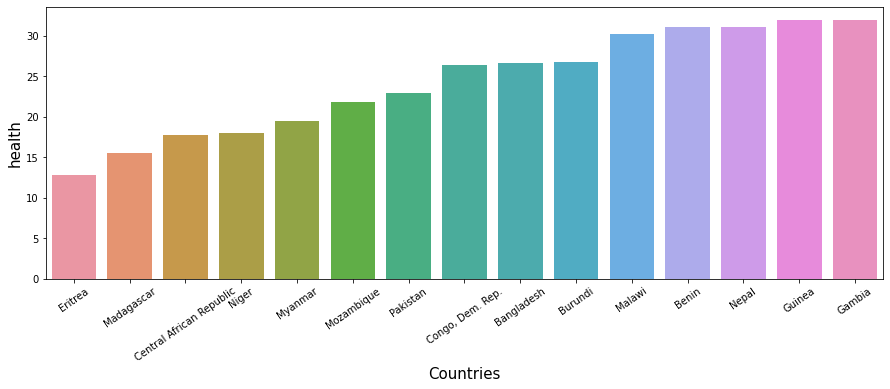

In [17]:
for (i,k) in enumerate(var):
    plt.figure(figsize=(15,5))
    sns.barplot(x='country', y=k['col_name'], data = country_data[['country',k['col_name']]].sort_values(k['col_name'],ascending=k['asc']).head(15))
    plt.xlabel('Countries',fontdict={'fontsize':15})
    plt.ylabel(k['col_name'],fontdict={'fontsize':15})
    plt.xticks(rotation=35)

In [18]:
top15_childMort = country_data[['country','child_mort']].sort_values('child_mort',ascending=False).head(15)['country']
bottom15_income = country_data[['country','income']].sort_values('income',ascending=True).head(15)['country']
bottom15_gdpp = country_data[['country','gdpp']].sort_values('gdpp',ascending=True).head(15)['country']

In [19]:
list(set(top15_childMort) & set(bottom15_income) & set(bottom15_gdpp))

['Central African Republic',
 'Congo, Dem. Rep.',
 'Sierra Leone',
 'Guinea-Bissau',
 'Niger']

<b>`INFERENCE`:</b> <br>
We can observe from plot that <b>`Guinea-Bissau, Sierra Leone,Congo, Dem. Rep., Central African Republic, Niger`</b> have high child mortality,low income and low gdpp. Such countries are in dire need of help.

# <font color='blue'>Step 4: Outlier Analysis</font>

From EDA performed above we can observe there are outliers present in the dataset. There are many ways by which we can treat outliers like z-score, capping, binning and so on. For this task we will use capping to treat outliers.

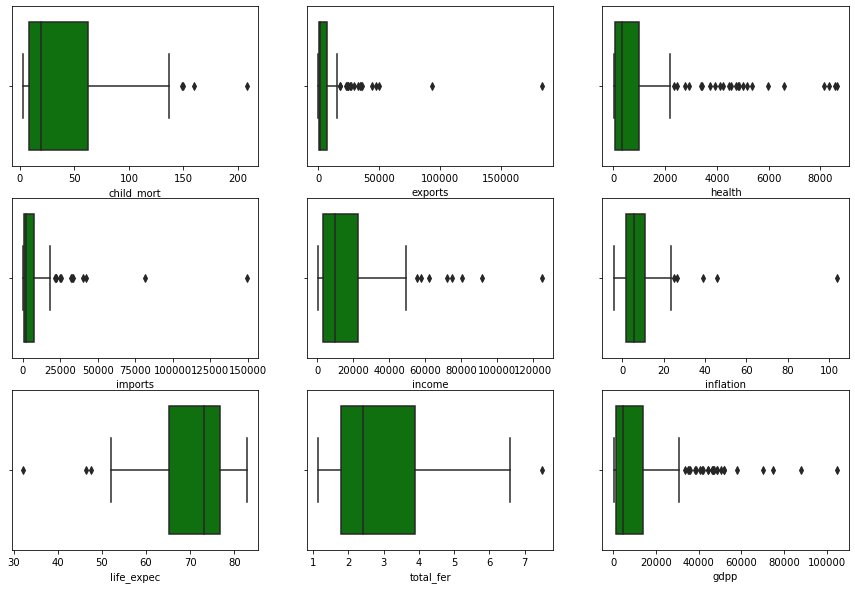

In [20]:
# Using boxplot
plt.figure(figsize=(15,10))
for col in enumerate(continuous_var):
    plt.subplot(3,3,col[0]+1);
    sns.boxplot(country_data[col[1]], color = 'green');

We will remove upper cap for income, gdpp, import, export, import, and health variables.

In [21]:
clean_country_data = country_data.copy()

In [22]:
percentiles = clean_country_data['income'].quantile([0.01,0.99]).values
clean_country_data['income'][clean_country_data['income'] >= percentiles[1]] = percentiles[1]

In [23]:
percentiles = clean_country_data['gdpp'].quantile([0.01,0.99]).values
clean_country_data['gdpp'][clean_country_data['gdpp'] >= percentiles[1]] = percentiles[1]

In [24]:
percentiles = clean_country_data['exports'].quantile([0.01,0.99]).values
clean_country_data['exports'][clean_country_data['exports'] >= percentiles[1]] = percentiles[1]

In [25]:
percentiles = clean_country_data['health'].quantile([0.01,0.99]).values
clean_country_data['health'][clean_country_data['health'] >= percentiles[1]] = percentiles[1]

In [26]:
percentiles = clean_country_data['imports'].quantile([0.01,0.99]).values
clean_country_data['imports'][clean_country_data['imports'] >= percentiles[1]] = percentiles[1]

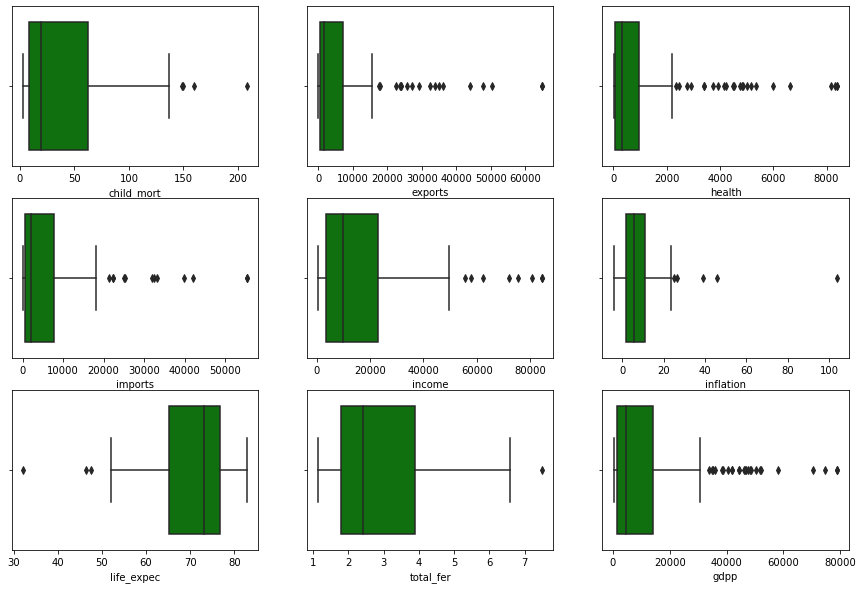

In [27]:
# Boxplot after removing outliers
plt.figure(figsize=(15,10))
for col in enumerate(continuous_var):
    plt.subplot(3,3,col[0]+1);
    sns.boxplot(clean_country_data[col[1]], color = 'green');

# <font color='blue'>Step 5:Preparing Data for Clustering</font>

In [28]:
# Scaling the data
scaler = PowerTransformer();
country_data_scaled = clean_country_data.copy()
country_data_scaled[continuous_var] = scaler.fit_transform(country_data_scaled[continuous_var])
country_data_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.266699,-1.649951,-1.239335,-1.252699,-1.368246,0.459416,-1.526455,1.544053,-1.461190
1,Albania,-0.220994,-0.250550,-0.043094,-0.065424,0.007269,-0.154659,0.621738,-0.992833,-0.123362
2,Algeria,0.217834,-0.040565,-0.270259,-0.279307,0.229138,1.059790,0.652698,0.313175,-0.065286
3,Angola,1.506186,0.092925,-0.662184,-0.232052,-0.415325,1.512843,-1.239045,1.623128,-0.222075
4,Antigua and Barbuda,-0.637380,0.608073,0.563355,0.771929,0.574308,-0.723442,0.699553,-0.368063,0.610448


# <font color='blue'>Step 6: Hopkins Test: To measure the cluster tendency</font>

### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values) 
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1]) 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0 
    return H

In [30]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_data_scaled[continuous_var])

0.8004255574613234

<b>`INFERENCE`: </b><br>
Since the value is between 0.7, ..., 0.99 therefore it has a high tendency to cluster

# <font color='blue'>Step 7: Finding the Optimal Number of Clusters:</font>

## 7.1 Elbow Curve

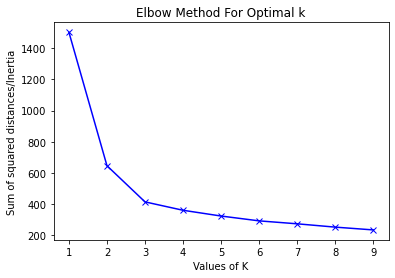

In [31]:
Sum_of_squared_distances = []
K = range(1,10) 
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data_scaled[continuous_var])
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

<b>`INFERENCE`</b>: <br>
In the above plot, elbow is at k=3(i.e. Sum of squared distances falls suddenly) indicating the optimal k for this dataset is 3.

## 7.2 Silhouette analysis

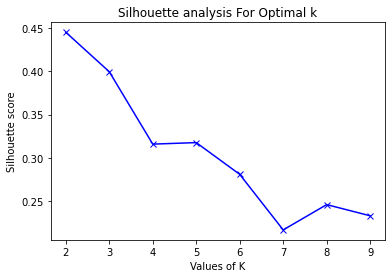

In [32]:
range_n_clusters = list(range(2,10)) 
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data_scaled[continuous_var])
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(country_data_scaled[continuous_var], cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()


<b>`INFERENCE`:</b> 
- After analysing the number of clusters from both the methods, I will use the model with k=3.
- We can divide the countries into 3 clusters i.e poor countries, intermediate countries and rich countires.

# <font color='blue'>Step 8: Modeling</font>

## 8.1 K-mean Clustering

In [33]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 0)
kmeans.fit(country_data_scaled[continuous_var])
kmeans.labels_

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0])

In [34]:
# Assigning the clusters to the dataset
country_data_scaled['km_cluster_id'] = kmeans.labels_
country_data_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster_id
0,Afghanistan,1.266699,-1.649951,-1.239335,-1.252699,-1.368246,0.459416,-1.526455,1.544053,-1.461190,0
1,Albania,-0.220994,-0.250550,-0.043094,-0.065424,0.007269,-0.154659,0.621738,-0.992833,-0.123362,1
2,Algeria,0.217834,-0.040565,-0.270259,-0.279307,0.229138,1.059790,0.652698,0.313175,-0.065286,1
3,Angola,1.506186,0.092925,-0.662184,-0.232052,-0.415325,1.512843,-1.239045,1.623128,-0.222075,0
4,Antigua and Barbuda,-0.637380,0.608073,0.563355,0.771929,0.574308,-0.723442,0.699553,-0.368063,0.610448,2


In [35]:
clean_country_data['km_cluster_id'] = kmeans.labels_
clean_country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


### 8.1.1 Analysing Data after Clustering

We will analyse the data using gdpp, child_mort and income variables
  - Poor Countries: Low GDPP, high child_more, low income.
  - Rich Countries: High GDPP, low child_more, high income.

In [36]:
# we will analyse the data using gdpp, child_mort and income variables
factors = ['gdpp','child_mort','income']

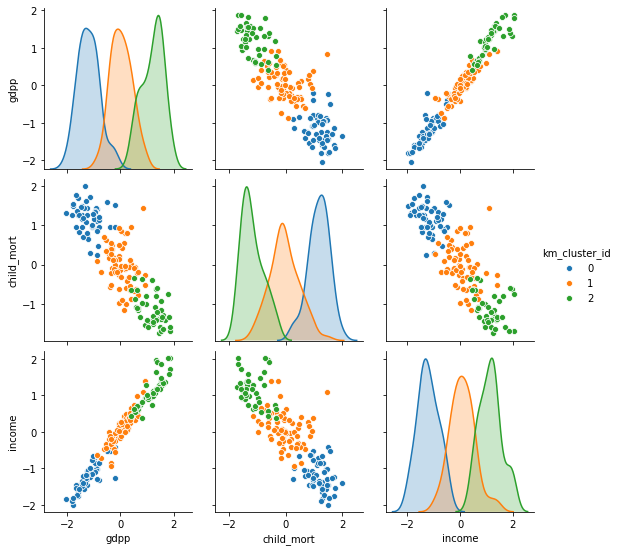

In [37]:
sns.pairplot(country_data_scaled[['gdpp','child_mort','income','km_cluster_id']],diag_kind='kde',hue='km_cluster_id')
plt.show()

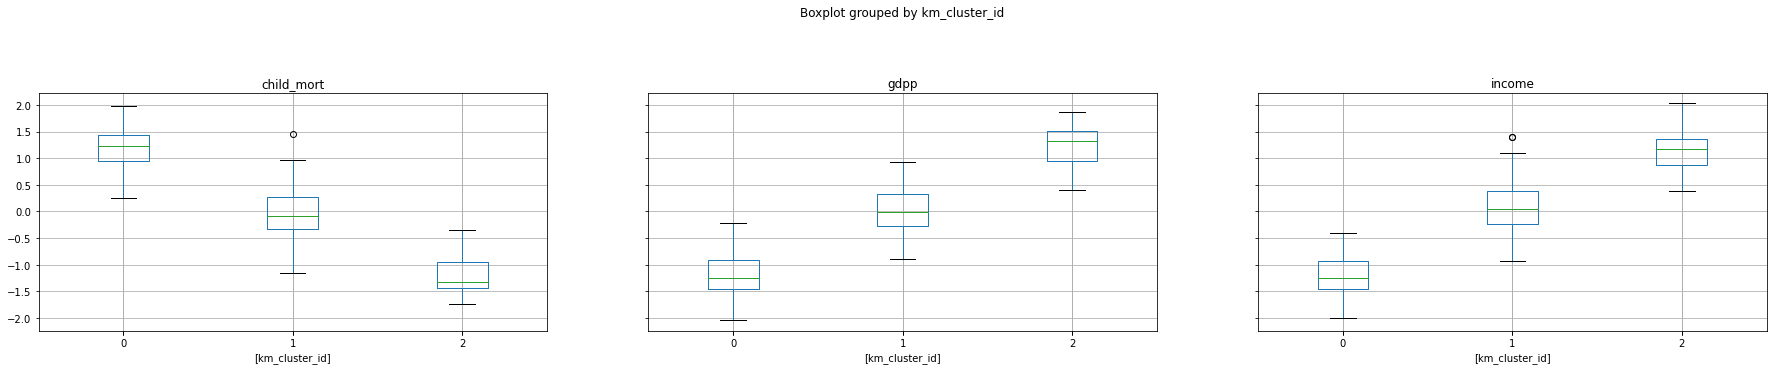

In [38]:
country_data_scaled[['gdpp','child_mort','income','km_cluster_id']].boxplot(by = 'km_cluster_id',layout=(3,3), figsize=(30, 15))
plt.show()

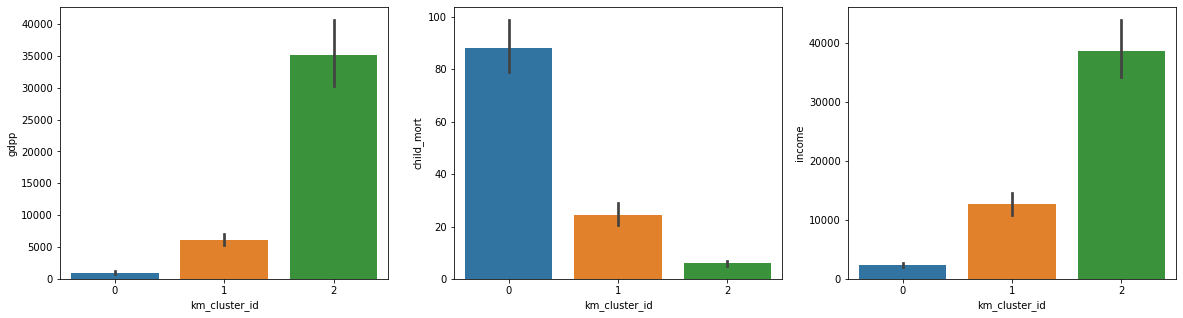

In [39]:
plt.figure(figsize=(20,5))
for (i,k) in enumerate(factors):
    plt.subplot(1,3,i+1);
    sns.barplot(x=clean_country_data.km_cluster_id, y=clean_country_data[k], data=clean_country_data)

<b>`INFERENCE`:</b> <br>
We can clearly notice that cluster number 0 (`Poor Countries`) has high child mortality rate, low income and verly low gdpp. The countries belonging to such group are in the direst need of aid.

### 8.1.2 Recommendation based on K-means Clustering

In [40]:
km_poor_countries = clean_country_data[clean_country_data['km_cluster_id']== 0].copy()
km_poor_countries = km_poor_countries[['country', 'child_mort', 'income', 'gdpp']].copy()

In [41]:
high_child_mor = km_poor_countries.sort_values('child_mort',ascending= False).head(15)
low_gdp = km_poor_countries.sort_values('gdpp',ascending= True).head(15)
low_income = km_poor_countries.sort_values('income',ascending= True).head(15)

In [42]:
kmeans_countries = list(set(high_child_mor['country']) & set(low_gdp['country']) & set(low_income['country']))

In [43]:
print(kmeans_countries)

['Central African Republic', 'Congo, Dem. Rep.', 'Sierra Leone', 'Guinea-Bissau', 'Niger']


In [44]:
high_child_mor

,country,child_mort,income,gdpp
66,Haiti,208.0,1500.0,662.0
132,Sierra Leone,160.0,1220.0,399.0
32,Chad,150.0,1930.0,897.0
31,Central African Republic,149.0,888.0,446.0
97,Mali,137.0,1870.0,708.0
113,Nigeria,130.0,5150.0,2330.0
112,Niger,123.0,814.0,348.0
3,Angola,119.0,5900.0,3530.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
25,Burkina Faso,116.0,1430.0,575.0


In [45]:
low_gdp

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231.0
88,Liberia,89.3,700.0,327.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
112,Niger,123.0,814.0,348.0
132,Sierra Leone,160.0,1220.0,399.0
93,Madagascar,62.2,1390.0,413.0
106,Mozambique,101.0,918.0,419.0
31,Central African Republic,149.0,888.0,446.0
94,Malawi,90.5,1030.0,459.0
50,Eritrea,55.2,1420.0,482.0


In [46]:
low_income

,country,child_mort,income,gdpp
37,"Congo, Dem. Rep.",116.0,609.0,334.0
88,Liberia,89.3,700.0,327.0
26,Burundi,93.6,764.0,231.0
112,Niger,123.0,814.0,348.0
31,Central African Republic,149.0,888.0,446.0
106,Mozambique,101.0,918.0,419.0
94,Malawi,90.5,1030.0,459.0
63,Guinea,109.0,1190.0,648.0
150,Togo,90.3,1210.0,488.0
132,Sierra Leone,160.0,1220.0,399.0


<b>`INFERENCE`: </b> <br>
Base on our analysis using K-means clustering, the Countries which the CEO needs to focus on the most are:
<b>
1. Sierra Leone
2. Niger
3. Guinea-Bissau
4. Congo, Dem. Rep.
5. Central African Republic
</b>

## 8.2 Perform Cluster profiling

In [47]:
clean_country_data[['income','gdpp','child_mort','km_cluster_id']].groupby('km_cluster_id').mean()

,income,gdpp,child_mort
km_cluster_id,,,
0,2314.660000,998.880000,88.116000
1,12613.285714,6175.857143,24.377143
2,38649.957447,35066.723404,5.934043


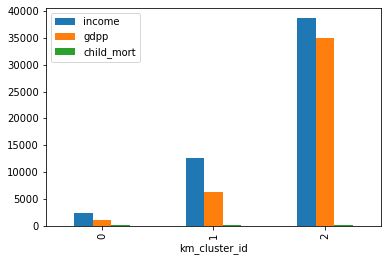

In [48]:
clean_country_data[['income','gdpp','child_mort','km_cluster_id']].groupby('km_cluster_id').mean().plot(kind= 'bar');

<b>`INFERENCE`: </b>
We can observe that cluster 0 has LOW GDPP, LOW INCOME and HIGH CHILD_MORT

In [49]:
Cluster_0 = clean_country_data[clean_country_data['km_cluster_id'] == 0]
Cluster_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster_id
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900.0,22.400,60.1,6.16,3530.0,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.140,70.4,2.33,758.0,0
17,Benin,111.0,180.40400,31.0780,281.976000,1820.0,0.885,61.8,5.36,758.0,0
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.60520,26.7960,90.552000,764.0,12.300,57.7,6.26,231.0,0
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520.0,3.120,66.1,2.88,786.0,0
28,Cameroon,108.0,290.82000,67.2030,353.700000,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.09600,40.6341,390.195000,1930.0,6.390,56.5,6.59,897.0,0


In [50]:
# number of data points in cluster 0
Cluster_0['km_cluster_id'].value_counts()

0    50
Name: km_cluster_id, dtype: int64

In [51]:
Cluster_0.sort_values(by=['income','gdpp','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster_id
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648.0,0
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0


<b>`INFERENCE`: </b></br>
We can observe the following countries are in dire need of aid(since they have low GDPP, low INCOME, high MORTALITY):
1. Congo, Dem. Rep.
2. Liberia
3. Burundi
4. Niger
5. Central African Republic
6. Mozambique
7. Malawi
8. Guinea
9. Togo
10. Sierra Leone

## 8.3 Hierarchical Clustering

In [52]:
country_data_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster_id
0,Afghanistan,1.266699,-1.649951,-1.239335,-1.252699,-1.368246,0.459416,-1.526455,1.544053,-1.461190,0
1,Albania,-0.220994,-0.250550,-0.043094,-0.065424,0.007269,-0.154659,0.621738,-0.992833,-0.123362,1
2,Algeria,0.217834,-0.040565,-0.270259,-0.279307,0.229138,1.059790,0.652698,0.313175,-0.065286,1
3,Angola,1.506186,0.092925,-0.662184,-0.232052,-0.415325,1.512843,-1.239045,1.623128,-0.222075,0
4,Antigua and Barbuda,-0.637380,0.608073,0.563355,0.771929,0.574308,-0.723442,0.699553,-0.368063,0.610448,2


### 8.3.1 Single Linkage

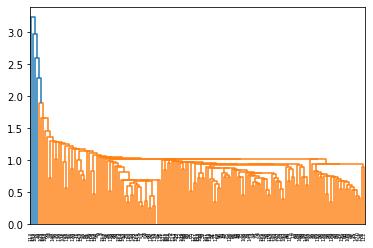

In [53]:
# single linkage
mergings = linkage(country_data_scaled[continuous_var], method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

<b>`INFERENCE`: </b> We observe that we cant get enough information from singale linkage. Therefore we will use complete linkage

### 8.3.2 Complete Linkage

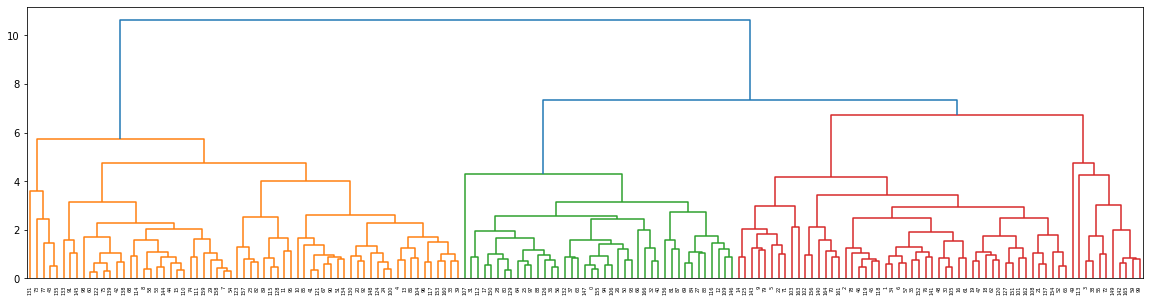

In [54]:
# complete linkage
plt.figure(figsize=(20,5))
completemerge = linkage(country_data_scaled[continuous_var], method="complete", metric='euclidean')
dendrogram(completemerge, color_threshold=7)
plt.show()

We can see 3 stable clusters in the above dendogram. So, we will go with final 3 clusters.

In [55]:
# 3 clusters
cluster_labels_h = cut_tree(completemerge, n_clusters=3).reshape(-1, )
cluster_labels_h

array([0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [56]:
# Assigning the clusters to the dataset
country_data_scaled['hierarchical_cluster_id'] = cluster_labels_h
country_data_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster_id,hierarchical_cluster_id
0,Afghanistan,1.266699,-1.649951,-1.239335,-1.252699,-1.368246,0.459416,-1.526455,1.544053,-1.461190,0,0
1,Albania,-0.220994,-0.250550,-0.043094,-0.065424,0.007269,-0.154659,0.621738,-0.992833,-0.123362,1,1
2,Algeria,0.217834,-0.040565,-0.270259,-0.279307,0.229138,1.059790,0.652698,0.313175,-0.065286,1,1
3,Angola,1.506186,0.092925,-0.662184,-0.232052,-0.415325,1.512843,-1.239045,1.623128,-0.222075,0,1
4,Antigua and Barbuda,-0.637380,0.608073,0.563355,0.771929,0.574308,-0.723442,0.699553,-0.368063,0.610448,2,2


## Analysing Data after clustering

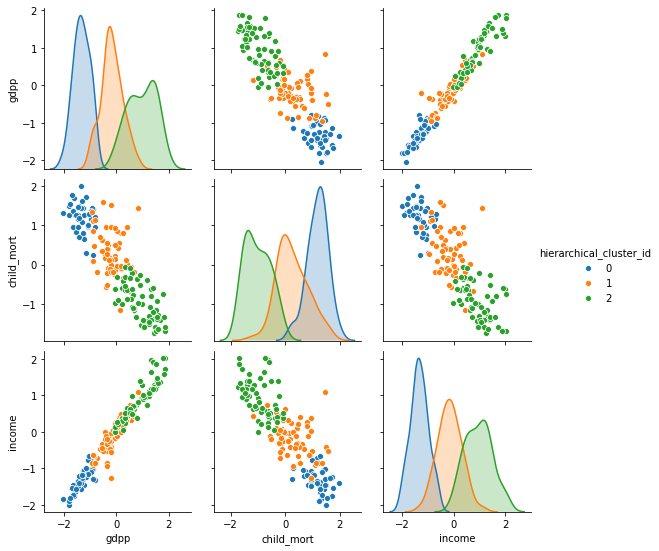

In [57]:
sns.pairplot(country_data_scaled[['gdpp','child_mort','income','hierarchical_cluster_id']],diag_kind='kde',hue='hierarchical_cluster_id')
plt.show()

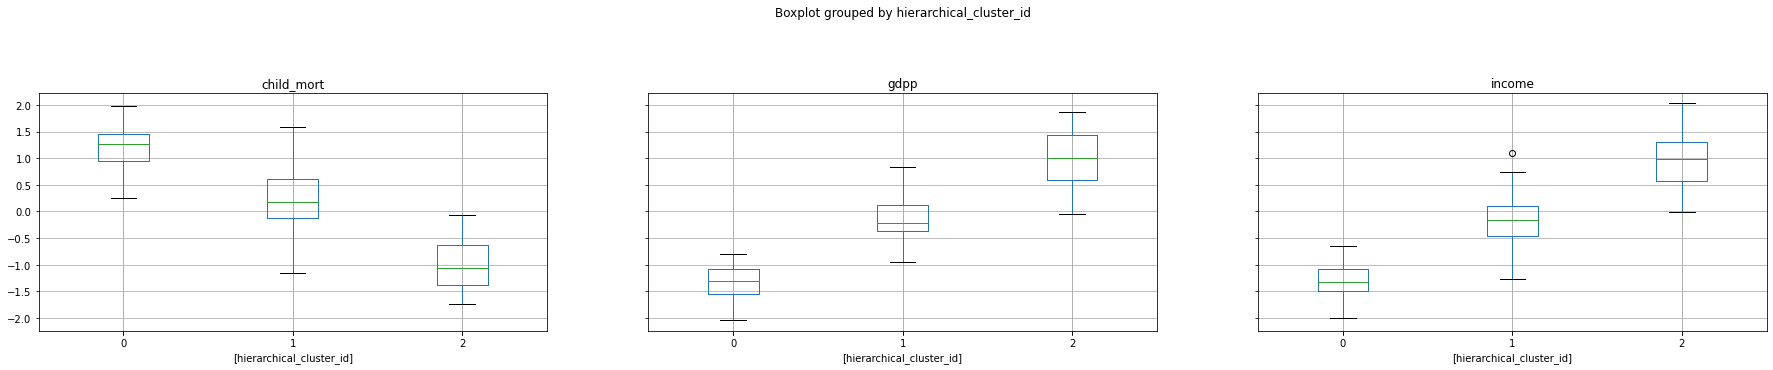

In [58]:
country_data_scaled[['gdpp','child_mort','income','hierarchical_cluster_id']].boxplot(by = 'hierarchical_cluster_id',layout=(3,3), figsize=(30, 15))
plt.show()

In [59]:
clean_country_data['hierarchical_cluster_id'] = cluster_labels_h
clean_country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster_id,hierarchical_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,2


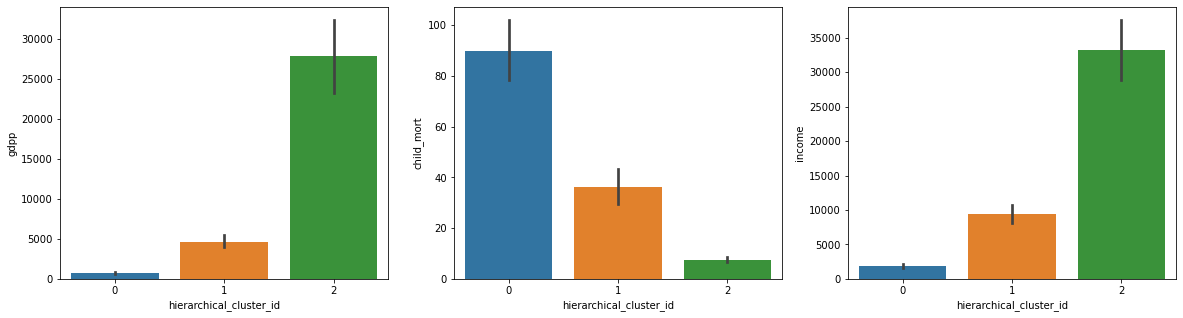

In [60]:
plt.figure(figsize=(20,5))
for (i,k) in enumerate(factors):
    plt.subplot(1,3,i+1);
    sns.barplot(x=clean_country_data.hierarchical_cluster_id, y=clean_country_data[k], data=clean_country_data)

<b>`INFERENCE`:</b> <br>
We can clearly notice that cluster number 0 (`Poor Countries`) has high child mortality rate, low income and very low gdpp. The countries belonging to such group are in the direst need of aid.

In [61]:
poor_countries_hierarchical = clean_country_data[clean_country_data['hierarchical_cluster_id']==0]
poor_countries = poor_countries_hierarchical[['country', 'child_mort', 'income', 'gdpp']]

In [62]:
hierarchical_high_child_mor = poor_countries.sort_values('child_mort',ascending= False).head(15)
hierarchical_low_gdp = poor_countries.sort_values('gdpp',ascending= True).head(15)
hierarchical_low_income = poor_countries.sort_values('income',ascending= True).head(15)

In [63]:
hierarchical_countries = list(set(hierarchical_high_child_mor['country']) & set(hierarchical_low_gdp['country']) & set(hierarchical_low_income['country']))

In [64]:
hierarchical_high_child_mor

,country,child_mort,income,gdpp
66,Haiti,208.0,1500.0,662.0
132,Sierra Leone,160.0,1220.0,399.0
32,Chad,150.0,1930.0,897.0
31,Central African Republic,149.0,888.0,446.0
97,Mali,137.0,1870.0,708.0
112,Niger,123.0,814.0,348.0
25,Burkina Faso,116.0,1430.0,575.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
64,Guinea-Bissau,114.0,1390.0,547.0
40,Cote d'Ivoire,111.0,2690.0,1220.0


In [65]:
hierarchical_low_gdp

,country,child_mort,income,gdpp
26,Burundi,93.6,764.0,231.0
88,Liberia,89.3,700.0,327.0
37,"Congo, Dem. Rep.",116.0,609.0,334.0
112,Niger,123.0,814.0,348.0
132,Sierra Leone,160.0,1220.0,399.0
93,Madagascar,62.2,1390.0,413.0
106,Mozambique,101.0,918.0,419.0
31,Central African Republic,149.0,888.0,446.0
94,Malawi,90.5,1030.0,459.0
50,Eritrea,55.2,1420.0,482.0


In [66]:
hierarchical_low_income

,country,child_mort,income,gdpp
37,"Congo, Dem. Rep.",116.0,609.0,334.0
88,Liberia,89.3,700.0,327.0
26,Burundi,93.6,764.0,231.0
112,Niger,123.0,814.0,348.0
31,Central African Republic,149.0,888.0,446.0
106,Mozambique,101.0,918.0,419.0
94,Malawi,90.5,1030.0,459.0
63,Guinea,109.0,1190.0,648.0
150,Togo,90.3,1210.0,488.0
132,Sierra Leone,160.0,1220.0,399.0


In [67]:
hierarchical_countries

['Mozambique',
 'Central African Republic',
 'Congo, Dem. Rep.',
 'Sierra Leone',
 'Guinea-Bissau',
 'Niger']

Base on our analysis using hierarchical clustering, the Countries which the CEO needs to focus on the most are:
<b>
1. Guinea-Bissau
2. Mozambique
3. Central African Republic
4. Congo, Dem. Rep.
5. Sierra Leone
6. Niger
7. Liberia
</b>

# <font color='blue'>Step 9: Summary/ Recommendation</font>

From my analysis using both K-means ,hierarchical clustering and EDA, the Countries which the CEO needs to focus on the most are:
<b>
1. Guinea-Bissau
2. Mozambique
3. Central African Republic
4. Congo, Dem. Rep.
5. Sierra Leone
6. Niger
</b>